# **Problem Statement** -
Objectives -



*   Content trend analysis for strategic recommendations.
*   How attributes like genras, audience preferences is affecting netflix growth online.
*   Since, Netflix serves diverse international audiences, country wise contributions provides valuable insights.

Expected Outcomes -



*   A clear understanding of how netflix content strategy has evolved over the years.
*  Strategic recommendation on the content types, Netflix should focus on in the future.





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Netflix Dataset.csv')

# **Data preprocessing**

# Exploring Data

In [3]:
df.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [4]:
df.tail(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7788,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


The dataset contains title, Director, Cast, Country, Release date, Rating, Duration, Type, Description of TV Show or a Movie

In [5]:
print(df.columns)

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')


In [6]:
#lets find out the types of each attribute
df.dtypes

,0
Show_Id,object
Category,object
Title,object
Director,object
Cast,object
Country,object
Release_Date,object
Rating,object
Duration,object
Type,object


Here some types are wrong such as Release Date, Duration, Rating. Now we will only be able to convert Release date to datetime format because in Duration somewhere it is given in minutes somewhere in seasons, somewhere probably in hours.

Since Datatypes of each attribute tells us about what are the operations that we can perform on it.Like if an integer value is written like it is a string then we will not be able to perform mean() or median() operations on them

In [7]:
#converting the release date and duration to datetime type and rating to float type
# df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['Release_Date'] = pd.to_datetime(df['Release_Date'].str.strip(), format='%B %d, %Y')


In [8]:
df.dtypes

,0
Show_Id,object
Category,object
Title,object
Director,object
Cast,object
Country,object
Release_Date,datetime64[ns]
Rating,object
Duration,object
Type,object


# Null Values Handling

In [9]:
df.isnull()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
7784,False,False,False,False,False,False,False,False,False,False,False
7785,False,False,False,False,False,False,False,False,False,False,False
7786,False,False,False,True,False,True,False,False,False,False,False
7787,False,False,False,True,False,False,False,False,False,False,False


here true represents null values presence and false represents their absence

In [10]:
#lets print number of null values in each column of table
df.isnull().sum()

,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Duration,0
Type,0


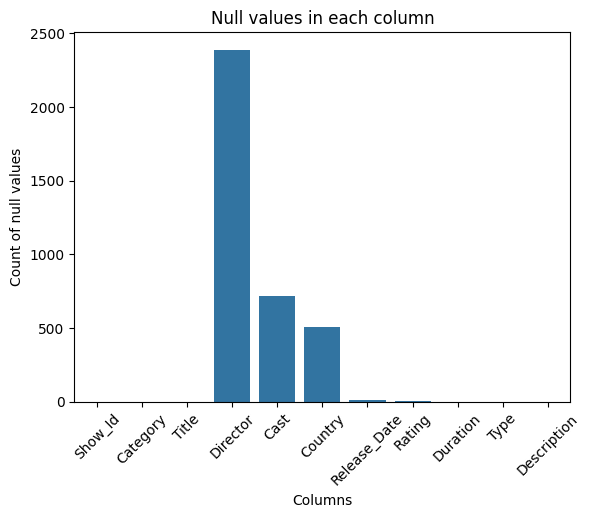

In [11]:
#we can also visualize these counts of null values for each attribute
# Compute null counts
null_counts = df.isnull().sum()

# Create a barplot (instead of countplot)
sns.barplot(x=null_counts.index, y=null_counts.values)

# Add labels and title (use plt, not sns)
plt.title("Null values in each column")
plt.xlabel("Columns")
plt.ylabel("Count of null values")

# Rotate x-labels if they overlap
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [12]:
#overall null values
df.isnull().sum().sum()

np.int64(3630)

In [13]:
#Now lets check for which columns i need to handle the null values
print("Percentage of null values in Director:",(df['Director'].isnull().sum()/len(df)) * 100)
print("Percentage of null values in Cast:",df['Cast'].isnull().sum()/len(df)* 100)
print("Percentage of null values in Country",df['Country'].isnull().sum()/len(df)*100)
print("Percentage of null values in Release Date:",df['Release_Date'].isnull().sum()/len(df)*100)

Percentage of null values in Director: 30.65862113236616
Percentage of null values in Cast: 9.218128129413275
Percentage of null values in Country 6.509179612273719
Percentage of null values in Release Date: 0.12838618564642446


Golden Rule - When the percentage of null values are lesser than 5% then we need not to handle it but null values percentage if greater than 5% then we need to handle it

In [14]:
df['Director'].fillna('Unknown',inplace = True)
df['Cast'].fillna('Unknown',inplace = True)

/tmp/ipython-input-3097670212.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Director'].fillna('Unknown',inplace = True)
/tmp/ipython-input-3097670212.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [15]:
#for country i can use mode operation because it may be possible that most of movies are from same country
df['Country'].fillna(df['Country'].mode()[0],inplace=True)

/tmp/ipython-input-2091456410.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country'].fillna(df['Country'].mode()[0],inplace=True)


In [16]:
df.isnull().sum()

,0
Show_Id,0
Category,0
Title,0
Director,0
Cast,0
Country,0
Release_Date,10
Rating,7
Duration,0
Type,0


# Handling Duplicates

Handling duplicates is important because the data with duplicates will demand more computational resources, and duplicates can make certain samples look more important than others which may mislead our model when will do prediction.

In [17]:
#printing rows which have duplicacy
duplicates = df[df.duplicated()]
print("Number of duplicated rows:",len(duplicates))

Number of duplicated rows: 2


In [18]:
df.drop_duplicates(inplace = True)

In [19]:
#now we have completely removed the duplicates
print(len(df[df.duplicated()]))

0


# Handling Outliers

Here there is no outlier since Ratings are not in float or, duration is different also so no outliers

Now the complete data preprocessing is done and the data is gathering valuable insights

#**Visualization**

Visualization is transformation of textual data into visuals

# Problem Statement 1:
How has the volume of Netflix content (movies vs TV shows) evolved over the years?

<Figure size 1200x600 with 0 Axes>

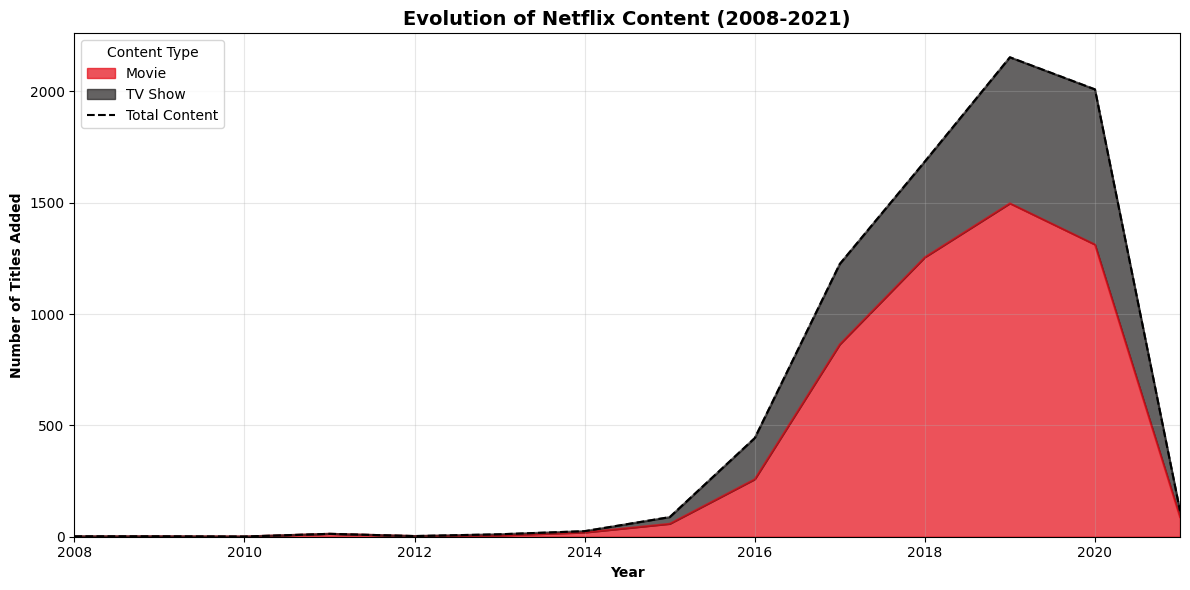

In [20]:
df['year'] = df['Release_Date'].dt.year

# Group data by year and type (Movie/TV Show)
content_by_year = df.groupby(['year', 'Category']).size().unstack().fillna(0)

# Plotting
plt.figure(figsize=(12, 6))
colors = ['#E50914', '#221F1F']  # Netflix brand colors

# Stacked area plot
content_by_year.plot(kind='area', stacked=True, color=colors, alpha=0.7, figsize=(12, 6))

# Line plot for total content
plt.plot(content_by_year.sum(axis=1), color='black', linestyle='--', label='Total Content')

# Formatting
plt.title('Evolution of Netflix Content (2008-2021)', fontweight='bold', fontsize=14)
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number of Titles Added', fontweight='bold')
plt.legend(title='Content Type', loc='upper left')
plt.grid(True, alpha=0.3)
plt.xlim(2008, 2021)  # Adjust based on your data range

plt.tight_layout()
plt.show()

This gives us the insight that TV Shows were popular at netflix throughout the years, movies go popularity from around 2014

# Problem Statement 2:

What are the most dominant genres on Netflix, and how has their popularity changed over time?

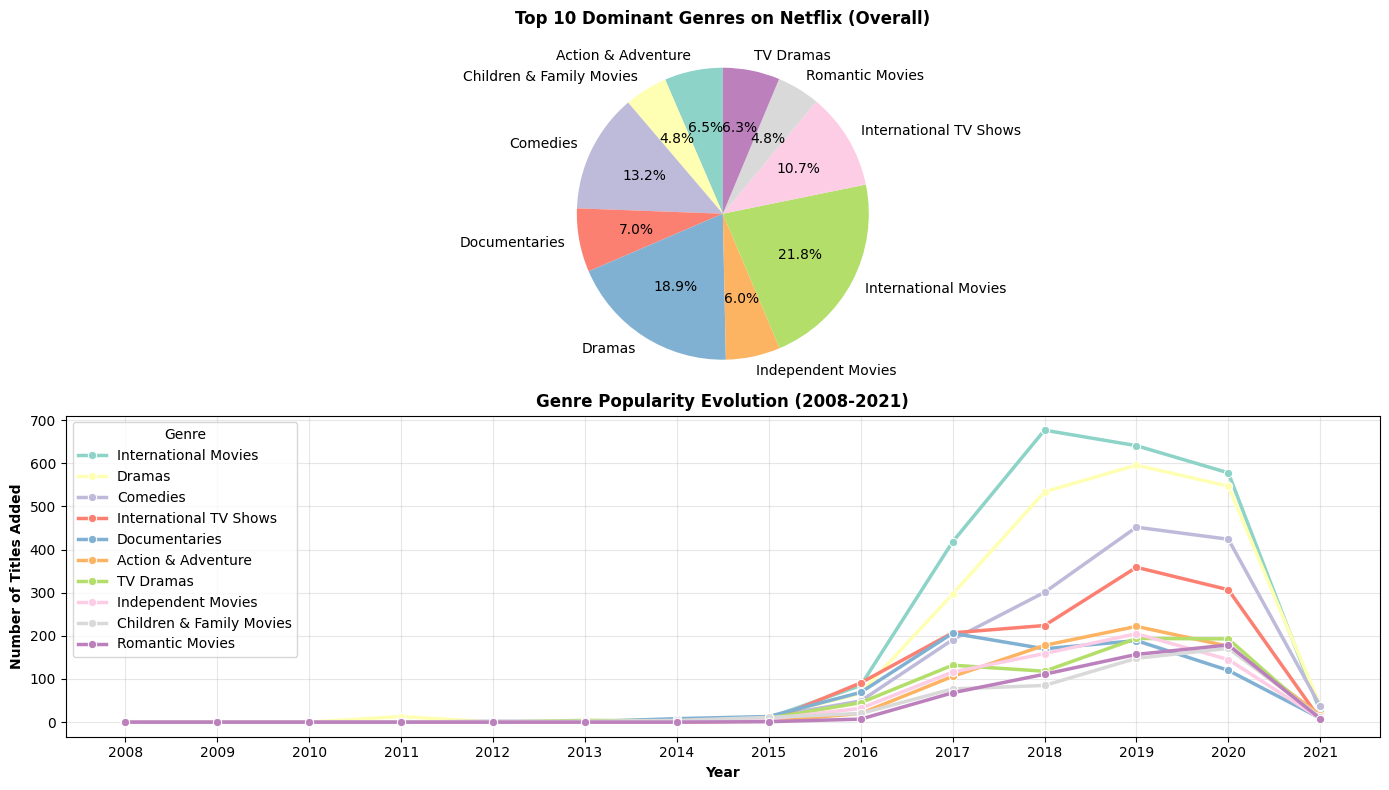

In [23]:
from collections import Counter
df['year'] = df['Release_Date'].dt.year.astype(np.float32)

# Clean genre data
df = df.dropna(subset=['year', 'Type'])
df['genre'] =df['Type'].str.split(',').apply(
    lambda x: [g.strip() for g in x]  # Split genres and clean whitespace
)

# Get top 10 most dominant genres overall
all_genres = [genre for genres in df['genre'] for genre in genres]
top_genres = [genre for genre, count in Counter(all_genres).most_common(10)]

# Create genre-year count matrix
genre_year_data = []
for year in sorted(df['year'].unique()):
    year_data = df[df['year'] == year]
    year_genres = [genre for genres in year_data['genre'] for genre in genres]
    genre_counts = Counter(year_genres)
    for genre in top_genres:
        genre_year_data.append({
            'Year': year,
            'Genre': genre,
            'Count': genre_counts.get(genre, 0)
        })

genre_year_df = pd.DataFrame(genre_year_data)

# Plotting
plt.figure(figsize=(14, 8))

# Plot 1: Overall Genre Dominance (Pie Chart)
plt.subplot(2, 1, 1)
overall_counts = genre_year_df.groupby('Genre')['Count'].sum()
plt.pie(overall_counts, labels=overall_counts.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('Set3', 10))
plt.title('Top 10 Dominant Genres on Netflix (Overall)\n', fontweight='bold')
plt.axis('equal')

# Plot 2: Genre Evolution Over Time (Line Plot)
plt.subplot(2, 1, 2)
sns.lineplot(data=genre_year_df, x='Year', y='Count', hue='Genre',
             palette='Set3', linewidth=2.5, marker='o')
plt.title('Genre Popularity Evolution (2008-2021)', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number of Titles Added', fontweight='bold')
plt.legend(title='Genre', loc='upper left')
plt.grid(alpha=0.3)
plt.xticks(genre_year_df['Year'].unique().astype(int))

plt.tight_layout()
plt.show()

# Additional Insight: Genre Growth Rates
genre_pivot = genre_year_df.pivot_table(index='Year', columns='Genre', values='Count')
genre_growth = pd.DataFrame({
    'Genre': top_genres,
    'StartCount': genre_pivot.loc[genre_pivot.index.min()],
    'EndCount': genre_pivot.loc[genre_pivot.index.max()],
    'GrowthRate': ((genre_pivot.loc[genre_pivot.index.max()] -
                   genre_pivot.loc[genre_pivot.index.min()]) /
                   genre_pivot.loc[genre_pivot.index.min()])
})


Genras Analysis -

Top 10 Dominant Genres on Neflix



---



International movies (Highest popularity)

Dramas

Comedies

International TV Shows

Documentaries

Action & Adventure

TV Dramas

Independent Movies

Children and Family Movies

Romantic Movies


---



Number of titles here refer to number of catalouges which are in favour of this.

# Problem Statement 3 -

Which 5 countries have seen the most growth in Netflix content production over the years?

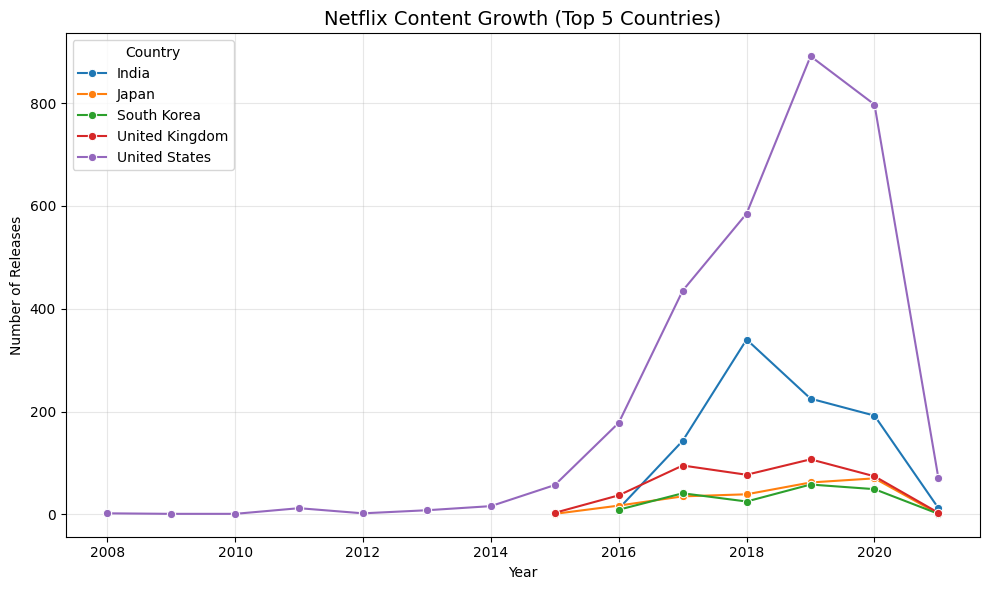

In [32]:
df['Year'] = df['Release_Date'].dt.year

# Group by country & year
country_growth = df.groupby(['Country', 'Year']).size().reset_index(name='Count')

# Get top 5 countries overall
top_countries = (
    country_growth.groupby('Country')['Count'].sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter only those
filtered = country_growth[country_growth['Country'].isin(top_countries)]

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=filtered, x='Year', y='Count', hue='Country', marker='o')
plt.title('Netflix Content Growth (Top 5 Countries)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

The top countries in which the netflix growth was prominent were United States, India, United kingdom, Japan, South Korea

# Problem Statement 4 -
Which genres attract the largest global audience, and do they differ significantly by region?



In [38]:
import plotly.express as px


# Split multi-genre strings into lists
df_genres = df.assign(Genre=df['Type'].str.split(','))

# Explode to separate rows per genre
df_genres = df_genres.explode('Genre')

# Clean whitespace
df_genres['Genre'] = df_genres['Genre'].str.strip()

# Group by Country and Genre
genre_country = df_genres.groupby(['Country', 'Genre']).size().reset_index(name='Count')

global_genre = df_genres['Genre'].value_counts().reset_index()
global_genre.columns = ['Genre', 'Count']

# # ---------------------------
# # 4️⃣ Hierarchical Treemap by Country + Genre
# # ---------------------------

fig = px.treemap(
    genre_country,
    path=['Country', 'Genre'],
    values='Count',
    color='Count',
    color_continuous_scale='Blues',
    title='🎬 Genre Popularity by Country on Netflix'
)
fig.show()



The above visualization gives us the information about Dramas, comedy and deocumentries popularities in United States. Public in India watch mostly the international movies, Dramas, comedy shows. Count of each show in any country can be visualized by the intensity of blue color.

# Problem Statement 5 -
Is there a relationship between content ratings (e.g., TV-MA, PG-13) and audience preferences?


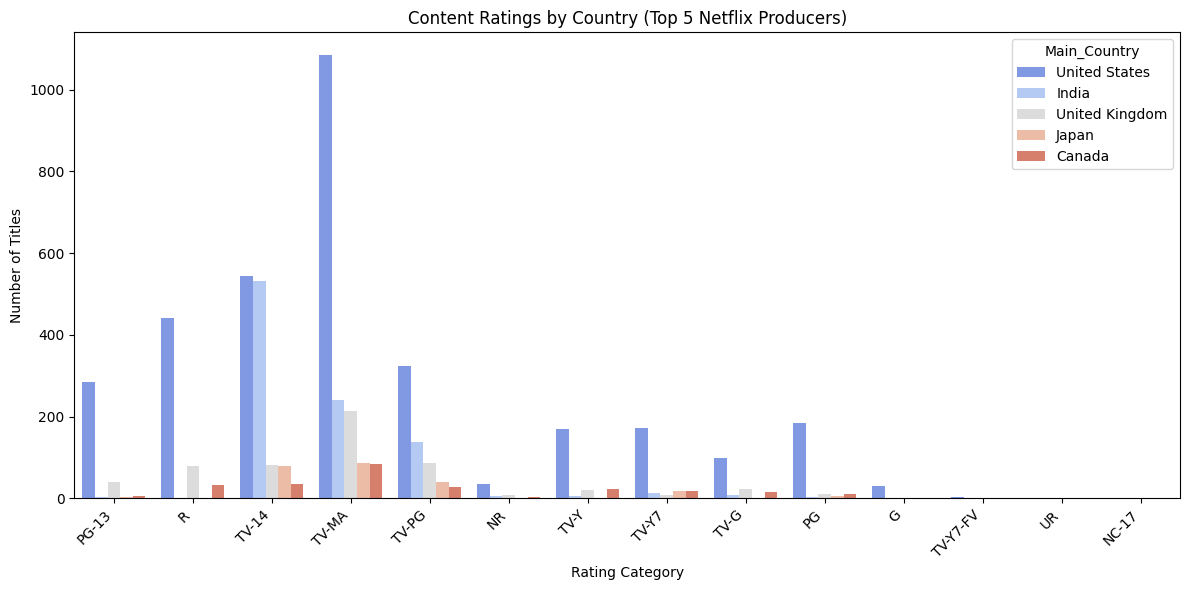

In [42]:
#visualize the content count for each rating category filtered by Region

import plotly.express as px

# Simplify multi-country entries (take the first country listed)
df['Main_Country'] = df['Country'].apply(lambda x: x.split(',')[0].strip())


top_countries = df['Main_Country'].value_counts().head(5).index
filtered = df[df['Main_Country'].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.countplot(data=filtered, x='Rating', hue='Main_Country', palette='coolwarm')
plt.title('Content Ratings by Country (Top 5 Netflix Producers)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Rating Category')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()

| Rating           | Meaning                                 | Suitable For                             | Typical Platform         |
| :--------------- | :-------------------------------------- | :--------------------------------------- | :----------------------- |
| **G**            | General Audience                        | All ages                                 | Movies (kids content)    |
| **TV-Y / TV-Y7** | Designed for children / older kids (7+) | Kids                                     | TV Shows                 |
| **PG**           | Parental Guidance suggested             | Some content may not suit kids           | Movies                   |
| **TV-PG**        | Parental Guidance                       | Similar to PG, mild violence or language | TV Shows                 |
| **PG-13**        | Parents strongly cautioned              | Teens 13+                                | Movies                   |
| **TV-14**        | Parents strongly cautioned              | Teens 14+                                | TV Shows                 |
| **R**            | Restricted                              | Adults 17+ (need parental guidance)      | Movies                   |
| **TV-MA**        | Mature Audience only                    | Adults (18+)                             | TV Shows                 |
| **NC-17**        | Adults only (explicit content)          | 18+                                      | Movies (rare on Netflix) |


**Important Insight** - In India audiences has given TV-14 ratings mostly which refers that parents in india are strongly cautioned about what they let the children watch on netflix. In United States mostly mature audiences watches TV Shows, etc. Wheras for teens 14+ their parents are also cautioned about TV Shows content.

# Problem Statement 6 -
Based on past trends, which content types or genres should Netflix prioritize for growth in the coming years?

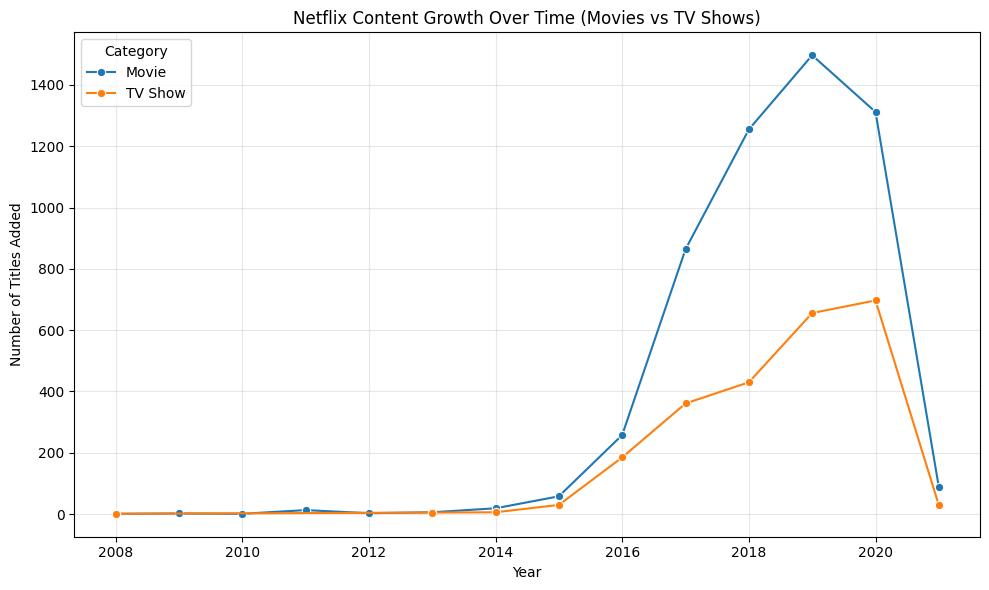

/tmp/ipython-input-1295995056.py:49: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




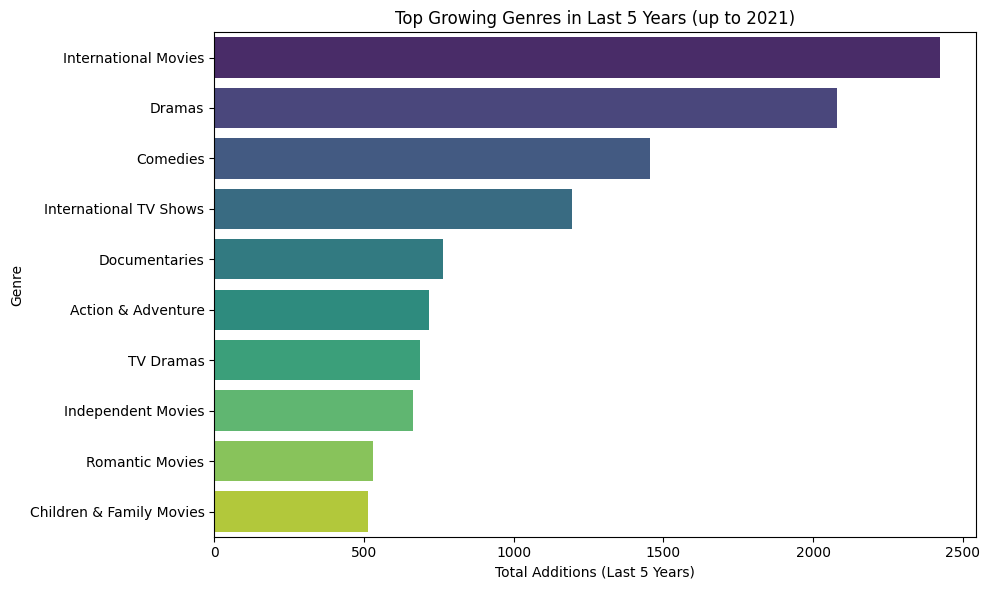

In [48]:
# ===========================
# 🎯 Netflix Growth Forecast Analysis
# ===========================

df['Year'] = df['Release_Date'].dt.year

# Drop null years
df = df.dropna(subset=['Year'])

# Split genres into multiple rows
df['Type'] = df['Type'].fillna('Unknown')
df_genres = df.assign(Genre=df['Type'].str.split(',')).explode('Genre')
df_genres['Genre'] = df_genres['Genre'].str.strip()

# ---------------------------
# Trend by Category (Movies vs TV Shows)
# ---------------------------

category_trend = (
    df.groupby(['Year', 'Category'])
    .size()
    .reset_index(name='Count')
)

plt.figure(figsize=(10,6))
sns.lineplot(data=category_trend, x='Year', y='Count', hue='Category', marker='o')
plt.title('Netflix Content Growth Over Time (Movies vs TV Shows)')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ---------------------------
# Calculate Growth Rate (Last 5 Years)
# ---------------------------

latest_year = int(df['Year'].max())
recent_period = genre_trend[genre_trend['Year'] >= latest_year - 5]

growth = (
    recent_period.groupby('Genre')['Count']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(data=growth.head(10), x='Count', y='Genre', palette='viridis')
plt.title(f'Top Growing Genres in Last 5 Years (up to {latest_year})')
plt.xlabel('Total Additions (Last 5 Years)')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

# ---------------------------
# 5️⃣ Insights Summary (Text-based)
# ---------------------------

top_growth = growth.head(5)['Genre'].tolist()


**Important Insight** -


*   Netflix should prioritize investing in these genres, as they show consistent upward trends globally.
*   Additionally, focus on TV Shows over Movies, since TV content shows higher year-on-year growth.



# Problem Statement 7 -
What are the underrepresented genres or regions that could present new opportunities for Netflix expansion?

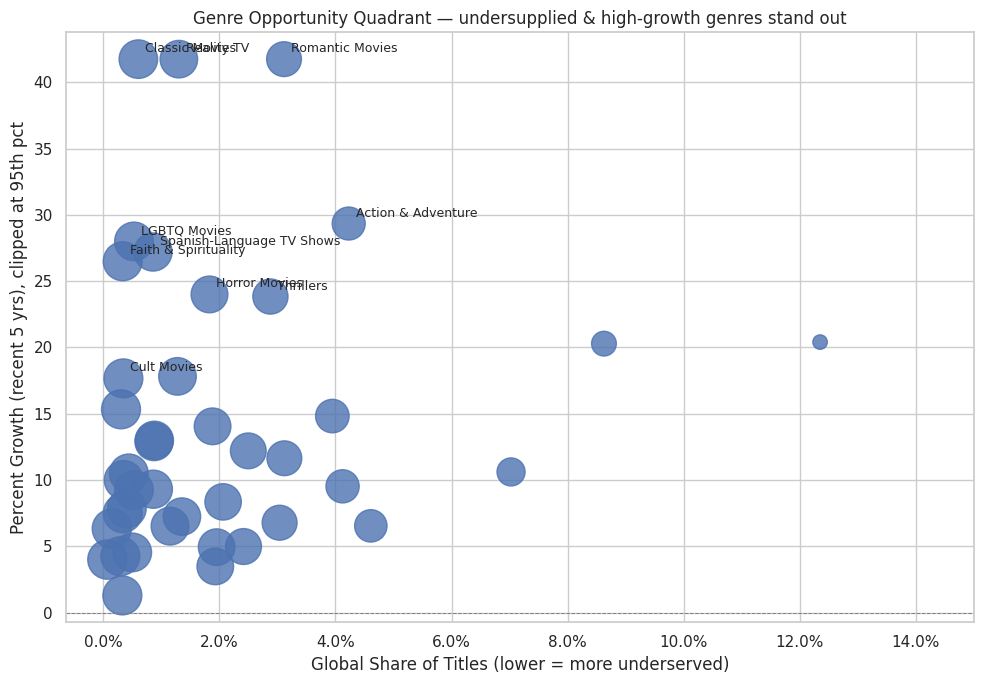

/tmp/ipython-input-3264664810.py:166: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




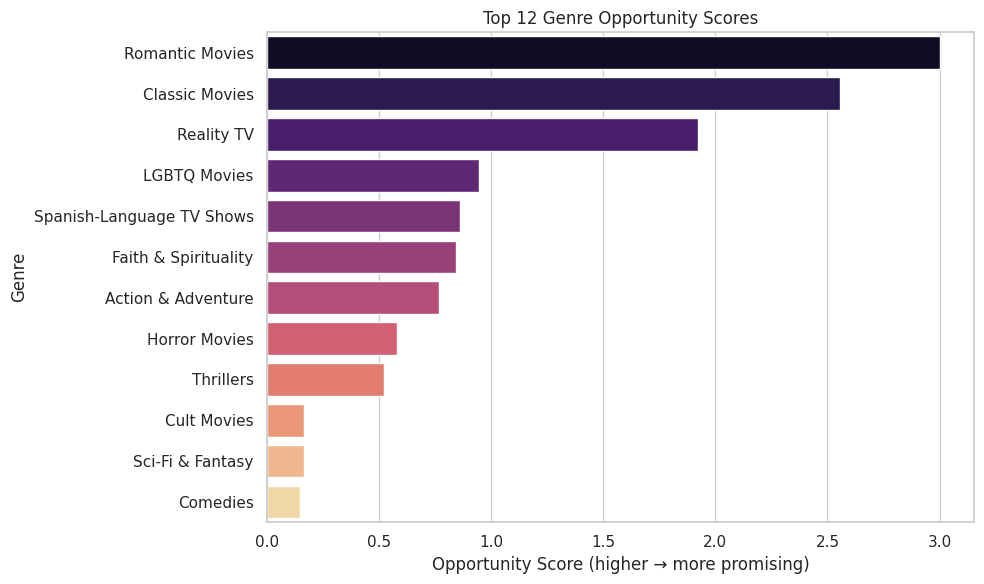

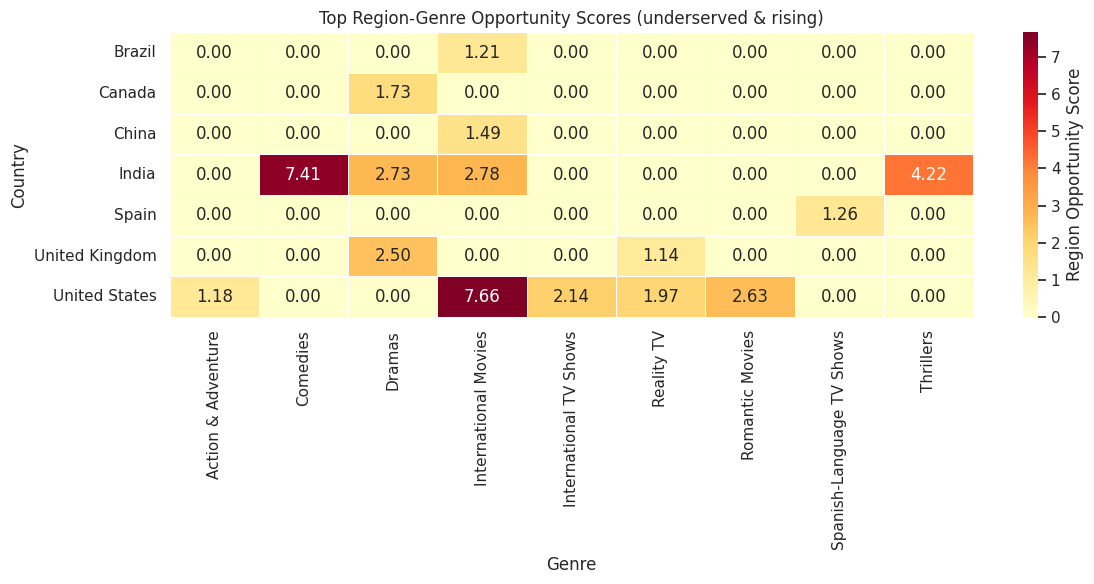


Top 10 Genre Opportunities (genre-level):
                    Genre  Total_Count  Global_Share  Recent_Count  Prior_Count  Pct_Growth  Opportunity
          Romantic Movies          531      0.031142           523            8   64.375000     3.003135
           Classic Movies          103      0.006041           101            2   49.500000     2.557872
               Reality TV          222      0.013020           217            5   42.400000     1.920293
             LGBTQ Movies           90      0.005278            87            3   28.000000     0.944817
Spanish-Language TV Shows          146      0.008563           141            5   27.200000     0.863168
     Faith & Spirituality           57      0.003343            55            2   26.500000     0.842973
       Action & Adventure          721      0.042285           698           23   29.347826     0.765387
            Horror Movies          312      0.018298           300           12   24.000000     0.581331
            

In [49]:
# ============================
# Gap Analysis: Underrepresented Genres & Regions (Opportunity Detection)
# ============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# --- PARAMETERS (tweak if needed) ---
RECENT_YEARS = 5   # length of "recent" window for growth calculation
TOP_N_GENRES = 10  # number of top genre opportunities to annotate
TOP_N_REGION_GENRE = 15  # number of top region-genre opportunities to list

# --- 0. Basic preparation (ensure required columns) ---
# df must exist in environment. If 'Year' isn't present, create from Release_Date
if 'Year' not in df.columns:
    df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
    df['Year'] = df['Release_Date'].dt.year

# Clean columns
df['Type'] = df['Type'].fillna('Unknown')
df['Country'] = df['Country'].fillna('Unknown')

# For multi-country entries, keep first listed country as Main_Country
df['Main_Country'] = df['Country'].apply(lambda x: str(x).split(',')[0].strip())

# --- 1. Explode genres into rows ---
df_genres = df.assign(Genre=df['Type'].str.split(',')).explode('Genre')
df_genres['Genre'] = df_genres['Genre'].str.strip().fillna('Unknown')

# Drop entries with no Year
df_genres = df_genres.dropna(subset=['Year'])

# --- 2. Compute global and recent counts per Genre ---
latest_year = int(df_genres['Year'].max())
recent_cutoff = latest_year - RECENT_YEARS + 1  # inclusive

# Count total per genre (overall)
genre_total = df_genres.groupby('Genre').size().reset_index(name='Total_Count')
total_titles = genre_total['Total_Count'].sum()
genre_total['Global_Share'] = genre_total['Total_Count'] / total_titles

# Count recent period and previous period
recent = df_genres[df_genres['Year'] >= recent_cutoff]
prior = df_genres[df_genres['Year'] < recent_cutoff]

genre_recent = recent.groupby('Genre').size().reset_index(name='Recent_Count')
genre_prior = prior.groupby('Genre').size().reset_index(name='Prior_Count')

genre_growth = pd.merge(genre_total, genre_recent, on='Genre', how='left').merge(genre_prior, on='Genre', how='left')
genre_growth['Recent_Count'] = genre_growth['Recent_Count'].fillna(0)
genre_growth['Prior_Count'] = genre_growth['Prior_Count'].fillna(0)

# Compute percent growth (handle zero prior)
def pct_change(r, p):
    if p == 0 and r == 0:
        return 0.0
    if p == 0:
        return float('inf')  # mark as infinite growth (newly emerging)
    return (r - p) / p

genre_growth['Pct_Growth'] = genre_growth.apply(lambda row: pct_change(row['Recent_Count'], row['Prior_Count']), axis=1)

# Replace infinite growth with a large number for ranking (but keep track)
max_finite = genre_growth.loc[np.isfinite(genre_growth['Pct_Growth']), 'Pct_Growth'].max()
genre_growth['Pct_Growth_clipped'] = genre_growth['Pct_Growth'].replace(np.inf, max_finite * 2 if pd.notnull(max_finite) else 100.0)

# Normalize metrics for opportunity score
# current share normalized (0..1)
min_share, max_share = genre_growth['Global_Share'].min(), genre_growth['Global_Share'].max()
genre_growth['Share_norm'] = (genre_growth['Global_Share'] - min_share) / (max_share - min_share + 1e-9)

# growth z-score
growth_mean = genre_growth['Pct_Growth_clipped'].mean()
growth_std = genre_growth['Pct_Growth_clipped'].std(ddof=0) if genre_growth['Pct_Growth_clipped'].std(ddof=0) > 0 else 1.0
genre_growth['Growth_z'] = (genre_growth['Pct_Growth_clipped'] - growth_mean) / growth_std

# Opportunity score (higher = more opportunity)
genre_growth['Opportunity'] = genre_growth['Growth_z'] * (1 - genre_growth['Share_norm'])

# Sort by opportunity
genre_growth_sorted = genre_growth.sort_values('Opportunity', ascending=False).reset_index(drop=True)

# --- 3. Region × Genre analysis: where region share < global share but region growth strong ---
# compute country-genre counts (recent and prior) and shares inside country
cg_total = df_genres.groupby(['Main_Country', 'Genre']).size().reset_index(name='Count')
country_total = df_genres.groupby('Main_Country').size().reset_index(name='Country_Total')

cg = pd.merge(cg_total, country_total, on='Main_Country', how='left')
cg['Country_Genre_Share'] = cg['Count'] / cg['Country_Total']

# Merge global share
cg = pd.merge(cg, genre_total[['Genre', 'Global_Share']], on='Genre', how='left')

# Compute recent growth per country-genre
recent_cg = recent.groupby(['Main_Country', 'Genre']).size().reset_index(name='Recent_Count')
prior_cg = prior.groupby(['Main_Country', 'Genre']).size().reset_index(name='Prior_Count')

cg = pd.merge(cg, recent_cg, on=['Main_Country', 'Genre'], how='left').merge(prior_cg, on=['Main_Country', 'Genre'], how='left')
cg['Recent_Count'] = cg['Recent_Count'].fillna(0)
cg['Prior_Count'] = cg['Prior_Count'].fillna(0)
cg['Pct_Growth'] = cg.apply(lambda r: pct_change(r['Recent_Count'], r['Prior_Count']), axis=1)
cg['Pct_Growth_clipped'] = cg['Pct_Growth'].replace(np.inf, np.nan)

# We'll compute a region-genre opportunity metric:
# condition: region_genre_share < global_share (underserved) AND recent growth positive
cg['Underserved'] = cg['Country_Genre_Share'] < cg['Global_Share']
cg['Recent_Growth_Positive'] = cg['Pct_Growth_clipped'] > 0

# For ranking, create score = (relative_growth_z) * (global_share - country_share normalized)
# compute relative growth z per cg (use overall distribution of cg growths)
valid_growth = cg['Pct_Growth_clipped'].dropna()
g_mean = valid_growth.mean() if not valid_growth.empty else 0.0
g_std = valid_growth.std(ddof=0) if not valid_growth.empty and valid_growth.std(ddof=0) > 0 else 1.0
cg['Growth_z'] = (cg['Pct_Growth_clipped'].fillna(0) - g_mean) / g_std

# gap = global_share - country_share (bigger positive gap = more underserved)
cg['Gap'] = cg['Global_Share'] - cg['Country_Genre_Share']
# normalize gap 0..1 per possible range
gap_min, gap_max = cg['Gap'].min(), cg['Gap'].max()
cg['Gap_norm'] = (cg['Gap'] - gap_min) / (gap_max - gap_min + 1e-9)

cg['Region_Opportunity'] = cg['Growth_z'] * cg['Gap_norm']

# Filter for meaningful country totals (avoid tiny countries with few titles)
MIN_COUNTRY_TITLES = 30
big_countries = country_total[country_total['Country_Total'] >= MIN_COUNTRY_TITLES]['Main_Country']
cg_filtered = cg[cg['Main_Country'].isin(big_countries)]

region_genre_sorted = cg_filtered.sort_values('Region_Opportunity', ascending=False).reset_index(drop=True)

# --- 4. Visualizations ---

sns.set(style='whitegrid')

# Visualization A: Opportunity Quadrant (Genre-level)
plt.figure(figsize=(10,7))
# x = current share, y = pct growth (clipped)
# use log or percent? we'll plot Growth_clipped (as numeric) on y-axis, but cap extremes for readability
cap = genre_growth_sorted['Pct_Growth_clipped'].quantile(0.95)
genre_growth_sorted['Pct_Growth_vis'] = genre_growth_sorted['Pct_Growth_clipped'].clip(upper=cap)

sizes = (1 - genre_growth_sorted['Share_norm']) * 800  # larger marker for more underserved
sc = plt.scatter(genre_growth_sorted['Global_Share'], genre_growth_sorted['Pct_Growth_vis'],
                 s=sizes, alpha=0.8)

# annotate top N opportunity genres
topN = genre_growth_sorted.head(TOP_N_GENRES)
for _, row in topN.iterrows():
    plt.annotate(row['Genre'], (row['Global_Share'], row['Pct_Growth_vis']),
                 textcoords="offset points", xytext=(5,5), ha='left', fontsize=9)

plt.xlabel('Global Share of Titles (lower = more underserved)')
plt.ylabel(f'Percent Growth (recent {RECENT_YEARS} yrs), clipped at 95th pct')
plt.title('Genre Opportunity Quadrant — undersupplied & high-growth genres stand out')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1%}'))
plt.tight_layout()
plt.show()

# Visualization B: Top Genre Opportunities (bar)
plt.figure(figsize=(10,6))
top_genres_plot = genre_growth_sorted.head(12)
sns.barplot(data=top_genres_plot, x='Opportunity', y='Genre', palette='magma')
plt.title(f'Top {len(top_genres_plot)} Genre Opportunity Scores')
plt.xlabel('Opportunity Score (higher → more promising)')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

# Visualization C: Region-Genre Gap Heatmap (focus on top region-genre candidates)
top_region_genre = region_genre_sorted.head(TOP_N_REGION_GENRE)
# pivot to heatmap: rows = Region, cols = Genre, value = Region_Opportunity (NaN -> 0)
heat_df = top_region_genre.pivot_table(index='Main_Country', columns='Genre', values='Region_Opportunity', fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(heat_df, cmap='YlOrRd', linewidths=0.4, annot=True, fmt='.2f', cbar_kws={'label':'Region Opportunity Score'})
plt.title('Top Region-Genre Opportunity Scores (underserved & rising)')
plt.ylabel('Country')
plt.xlabel('Genre')
plt.tight_layout()
plt.show()

# --- 5. Print top candidates for quick inspection ---
print("\nTop 10 Genre Opportunities (genre-level):")
print(genre_growth_sorted[['Genre', 'Total_Count', 'Global_Share', 'Recent_Count', 'Prior_Count', 'Pct_Growth', 'Opportunity']].head(10).to_string(index=False))

print("\nTop 15 Region-Genre Opportunities (country-level):")
print(region_genre_sorted[['Main_Country', 'Genre', 'Count', 'Country_Genre_Share', 'Global_Share', 'Recent_Count', 'Prior_Count', 'Pct_Growth', 'Region_Opportunity']].head(15).to_string(index=False))


**Important Insights-**
Opportunity Score is potential for growth

*   Romantic, Classic Movies and Reality TV are the top 3 genres which have greatest percentage growth and hence these genres worth Netflix investing time and money.
*   Additonally Opportunity score of comedies in India is high, Opportunity score of internatinal movies in United States is high, Opportunity score of thrillers is also high in India.




# Conclusion

In this Netflix dataset analysis we have found some imoortant insights which are potential strategies which netflix can adopt to evolve and compete with other online entertainment platforms.